In [7]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src")

In [8]:
from simulation import BaseSimulation
from individual_interaction_population import IndividualInteractionPopulation
from base_test_protocol import EmptyTestProtocol, QuarantineSymptomaticProtocol

In [17]:
def run_simulation(n_agents, interactions_per_person, interaction_infection_pct, time_horizon, verbose=True):
    #n_agents = int(1E3)
    disease_length = 14
    quarantine_length = 14
    days_until_symptomatic = 7

    #interactions_per_person = 1
    interaction_frequency_lambda =  interactions_per_person
    #interaction_infection_pct = 0.3

    population = IndividualInteractionPopulation(n_agents,
                                                disease_length,
                                                quarantine_length,
                                                days_until_symptomatic,
                                                interaction_frequency_lambda,
                                                interaction_infection_pct,
                                                initial_prevalence=0.005)
    
    # select only a single individual to be infected:
    infected_agent = np.random.choice(range(n_agents))
    for agent_idx in range(n_agents):
        if agent_idx == infected_agent:
            population.infection_status[agent_idx] = True
        else:
            population.infection_status[agent_idx] = False
    
    empty_protocol = EmptyTestProtocol()
    simulation = BaseSimulation(population, empty_protocol, test_frequency=100, test_latency=100)
    for day in range(time_horizon):
        simulation.step()
        if verbose:
            print("Done simulating day {}".format(day+1))
    
    return simulation

In [26]:
sim_results = {}
interactions_per_person_values = [0.5, 1, 2, 3,10]
infection_pct = 0.05
time_horizons = {0.5:200, 1:200, 2:200, 3: 200, 10: 200}

for interactions_pp in interactions_per_person_values:
    sim_results[interactions_pp] = []
    time_horizon = time_horizons[interactions_pp]
    for x in range(25):
        sim = run_simulation(n_agents = 1000,
                            interactions_per_person=interactions_pp,
                            interaction_infection_pct = infection_pct,
                            time_horizon=time_horizon,
                            verbose=False)
        sim_results[interactions_pp].append(sim)
        print("Done iteration {} for interactions_pp value {}".format(x+1, interactions_pp))

Done iteration 1 for interactions_pp value 0.5
Done iteration 2 for interactions_pp value 0.5
Done iteration 3 for interactions_pp value 0.5
Done iteration 4 for interactions_pp value 0.5
Done iteration 5 for interactions_pp value 0.5
Done iteration 6 for interactions_pp value 0.5
Done iteration 7 for interactions_pp value 0.5
Done iteration 8 for interactions_pp value 0.5
Done iteration 9 for interactions_pp value 0.5
Done iteration 10 for interactions_pp value 0.5
Done iteration 11 for interactions_pp value 0.5
Done iteration 12 for interactions_pp value 0.5
Done iteration 13 for interactions_pp value 0.5
Done iteration 14 for interactions_pp value 0.5
Done iteration 15 for interactions_pp value 0.5
Done iteration 16 for interactions_pp value 0.5
Done iteration 17 for interactions_pp value 0.5
Done iteration 18 for interactions_pp value 0.5
Done iteration 19 for interactions_pp value 0.5
Done iteration 20 for interactions_pp value 0.5
Done iteration 21 for interactions_pp value 0.5
D

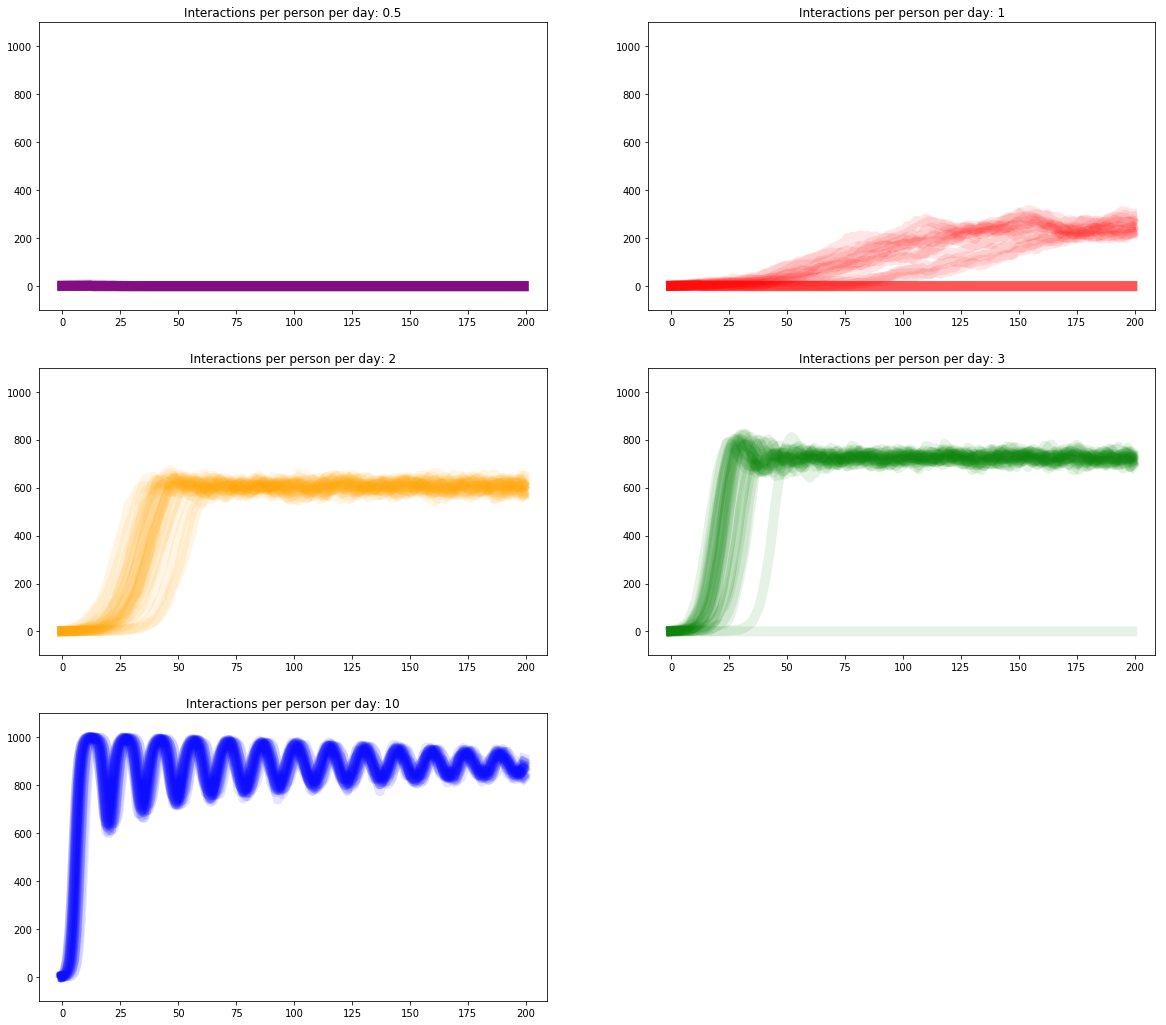

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,18))
interactions_per_person_values = [0.5, 1, 2, 3,10]

colors={0.5:'purple', 1:'red', 2:'orange', 3:'green', 10:'blue'}


subplot_val = 321

for interactions_pp in interactions_per_person_values:
    plt.subplot(subplot_val)
    plt.title("Interactions per person per day: {}".format(interactions_pp))
    plt.ylim(-100,1100)
    subplot_val += 1
    days=list(range(time_horizons[interactions_pp]))
    for sim in sim_results[interactions_pp]:
        infections = [sim.summary_population_data[day]['num_infected'] for day in days]
        plt.plot(days, infections, label="{} Interactions per person per day".format(interactions_pp), 
                 linewidth=10.0, alpha=0.1, color=colors[interactions_pp])

plt.show()

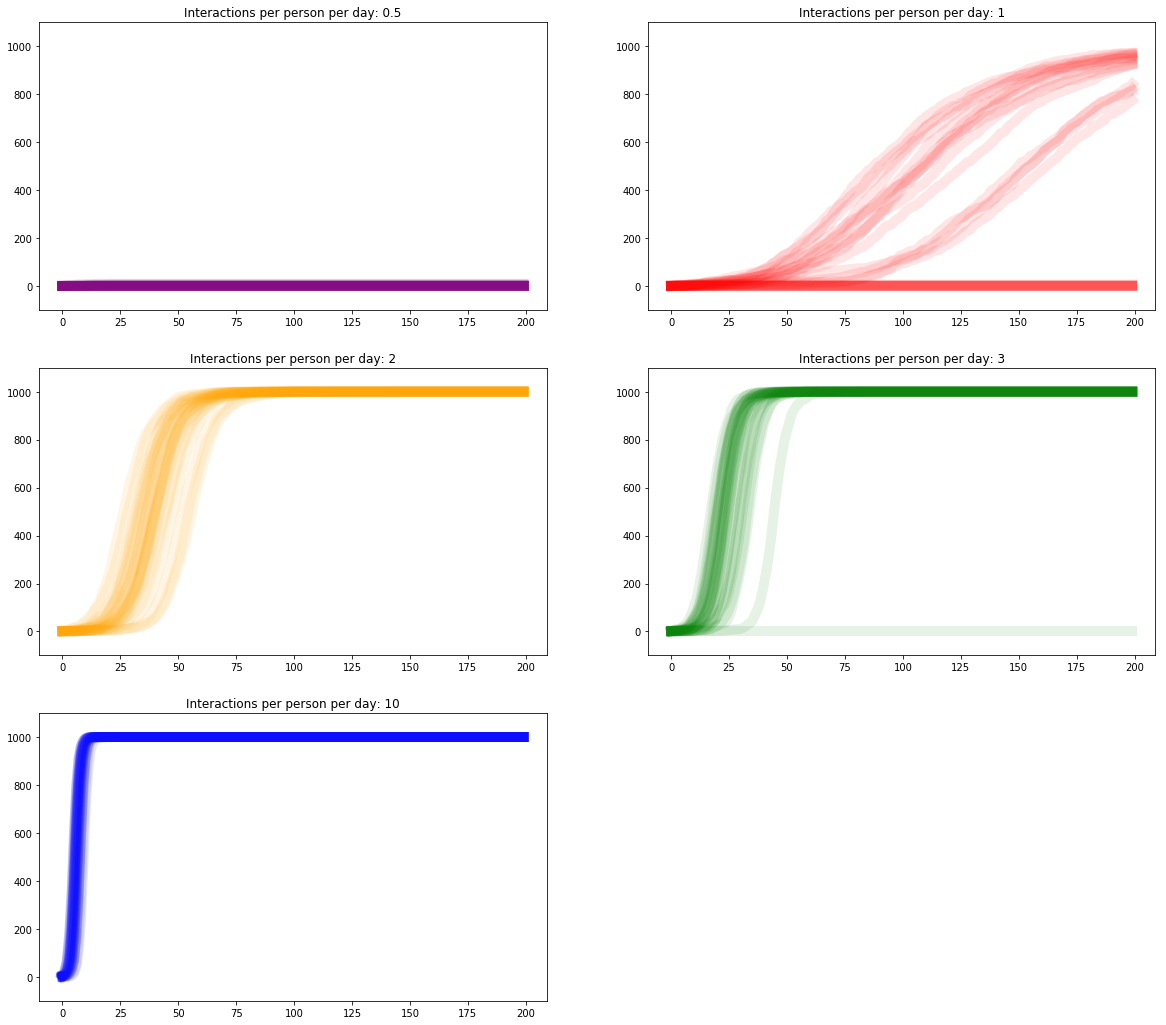

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,18))
interactions_per_person_values = [0.5, 1, 2, 3,10]

colors={0.5:'purple', 1:'red', 2:'orange', 3:'green', 10:'blue'}


subplot_val = 321

for interactions_pp in interactions_per_person_values:
    plt.subplot(subplot_val)
    plt.title("Interactions per person per day: {}".format(interactions_pp))
    plt.ylim(-100,1100)

    subplot_val += 1
    days=list(range(time_horizons[interactions_pp]))
    for sim in sim_results[interactions_pp]:
        infections = [sim.summary_population_data[day]['cumulative_num_infected'] for day in days]
        plt.plot(days, infections, label="{} Interactions per person per day".format(interactions_pp), 
                 linewidth=10.0, alpha=0.1, color=colors[interactions_pp])

plt.show()

In [12]:
%timeit simulation.population.legacy_step()

658 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit simulation.population.step()

2.62 ms ± 325 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
sim_results = {}
interactions_per_person_values = [0.5, 1, 2, 3,10]
infection_pct = 0.05
time_horizons = {0.5:200, 1:200, 2:200, 3: 200, 10: 200}

for interactions_pp in interactions_per_person_values:
    sim_results[interactions_pp] = []
    time_horizon = time_horizons[interactions_pp]
    for x in range(25):
        sim = run_simulation(n_agents = 1000,
                            interactions_per_person=interactions_pp,
                            interaction_infection_pct = infection_pct,
                            time_horizon=time_horizon,
                            verbose=True)
        sim_results[interactions_pp].append(sim)
        print("Done iteration {} for interactions_pp value {}".format(x+1, interactions_pp))

Done simulating day 1
Done simulating day 2
Done simulating day 3
Done simulating day 4
Done simulating day 5
Done simulating day 6
Done simulating day 7
Done simulating day 8
Done simulating day 9
Done simulating day 10
Done simulating day 11
Done simulating day 12
Done simulating day 13
Done simulating day 14
Done simulating day 15
Done simulating day 16
Done simulating day 17
Done simulating day 18
Done simulating day 19
Done simulating day 20
Done simulating day 21
Done simulating day 22
Done simulating day 23
Done simulating day 24
Done simulating day 25
Done simulating day 26
Done simulating day 27
Done simulating day 28
Done simulating day 29
Done simulating day 30
Done simulating day 31
Done simulating day 32
Done simulating day 33
Done simulating day 34
Done simulating day 35
Done simulating day 36
Done simulating day 37
Done simulating day 38
Done simulating day 39
Done simulating day 40
Done simulating day 41
Done simulating day 42
Done simulating day 43
Done simulating day 

Done simulating day 36
Done simulating day 37
Done simulating day 38
Done simulating day 39
Done simulating day 40
Done simulating day 41
Done simulating day 42
Done simulating day 43
Done simulating day 44
Done simulating day 45
Done simulating day 46
Done simulating day 47
Done simulating day 48
Done simulating day 49
Done simulating day 50
Done simulating day 51
Done simulating day 52
Done simulating day 53
Done simulating day 54
Done simulating day 55
Done simulating day 56
Done simulating day 57
Done simulating day 58
Done simulating day 59
Done simulating day 60
Done simulating day 61
Done simulating day 62
Done simulating day 63
Done simulating day 64
Done simulating day 65
Done simulating day 66
Done simulating day 67
Done simulating day 68
Done simulating day 69
Done simulating day 70
Done simulating day 71
Done simulating day 72
Done simulating day 73
Done simulating day 74
Done simulating day 75
Done simulating day 76
Done simulating day 77
Done simulating day 78
Done simula

Done simulating day 35
Done simulating day 36
Done simulating day 37
Done simulating day 38
Done simulating day 39
Done simulating day 40
Done simulating day 41
Done simulating day 42
Done simulating day 43
Done simulating day 44
Done simulating day 45
Done simulating day 46
Done simulating day 47
Done simulating day 48
Done simulating day 49
Done simulating day 50
Done simulating day 51
Done simulating day 52
Done simulating day 53
Done simulating day 54
Done simulating day 55
Done simulating day 56
Done simulating day 57
Done simulating day 58
Done simulating day 59
Done simulating day 60
Done simulating day 61
Done simulating day 62
Done simulating day 63
Done simulating day 64
Done simulating day 65
Done simulating day 66
Done simulating day 67
Done simulating day 68
Done simulating day 69
Done simulating day 70
Done simulating day 71
Done simulating day 72
Done simulating day 73
Done simulating day 74
Done simulating day 75
Done simulating day 76
Done simulating day 77
Done simula

Done simulating day 27
Done simulating day 28
Done simulating day 29
Done simulating day 30
Done simulating day 31
Done simulating day 32
Done simulating day 33
Done simulating day 34
Done simulating day 35
Done simulating day 36
Done simulating day 37
Done simulating day 38
Done simulating day 39
Done simulating day 40
Done simulating day 41
Done simulating day 42
Done simulating day 43
Done simulating day 44
Done simulating day 45
Done simulating day 46
Done simulating day 47
Done simulating day 48
Done simulating day 49
Done simulating day 50
Done simulating day 51
Done simulating day 52
Done simulating day 53
Done simulating day 54
Done simulating day 55
Done simulating day 56
Done simulating day 57
Done simulating day 58
Done simulating day 59
Done simulating day 60
Done simulating day 61
Done simulating day 62
Done simulating day 63
Done simulating day 64
Done simulating day 65
Done simulating day 66
Done simulating day 67
Done simulating day 68
Done simulating day 69
Done simula

KeyboardInterrupt: 

In [15]:
def f(simulation):
    for _ in range(10):
        simulation.step()
%timeit f(simulation)

26.8 ms ± 52 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
import random
random.choices(set([1,2,3,4]),k=10)

TypeError: 'set' object does not support indexing

In [43]:
disease_length = 14
quarantine_length = 14
days_until_symptomatic = 7

interactions_per_person = 1
interaction_frequency_lambda =  interactions_per_person
interaction_infection_pct = 0.05

n_agents=10000

population = IndividualInteractionPopulation(n_agents,
                                            disease_length,
                                            quarantine_length,
                                            days_until_symptomatic,
                                            interaction_frequency_lambda,
                                            interaction_infection_pct,
                                            initial_prevalence=0.005)

# select only a single individual to be infected:
infected_agent = np.random.choice(range(n_agents))
for agent_idx in range(n_agents):
    if agent_idx == infected_agent:
        population.infection_status[agent_idx] = True
    else:
        population.infection_status[agent_idx] = False

empty_protocol = EmptyTestProtocol()
simulation = BaseSimulation(population, empty_protocol, test_frequency=100, test_latency=100)


In [44]:
import cProfile
cProfile.run('simulation.population.step()')

         50185 function calls in 0.376 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.178    0.178 <__array_function__ internals>:2(copyto)
        1    0.000    0.000    0.376    0.376 <string>:1(<module>)
    20080    0.003    0.000    0.003    0.000 base_population.py:128(is_agent_infected)
    10000    0.001    0.000    0.001    0.000 base_population.py:133(is_agent_quarantined)
        1    0.000    0.000    0.000    0.000 base_population.py:137(get_num_quarantined)
        1    0.186    0.186    0.376    0.376 individual_interaction_population.py:70(step)
        1    0.002    0.002    0.003    0.003 individual_interaction_population.py:74(<listcomp>)
        1    0.000    0.000    0.000    0.000 multiarray.py:1043(copyto)
        1    0.000    0.000    0.178    0.178 numeric.py:166(ones)
        1    0.000    0.000    0.000    0.000 numeric.py:1782(isscalar)
        2    0.000    0.0

In [45]:
cProfile.run('simulation.step()')

         49853 function calls in 0.411 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.179    0.179 <__array_function__ internals>:2(copyto)
        1    0.000    0.000    0.411    0.411 <string>:1(<module>)
    19906    0.007    0.000    0.007    0.000 base_population.py:128(is_agent_infected)
    10000    0.003    0.000    0.003    0.000 base_population.py:133(is_agent_quarantined)
        2    0.000    0.000    0.001    0.000 base_population.py:137(get_num_quarantined)
        1    0.000    0.000    0.000    0.000 base_population.py:141(get_num_infected)
        1    0.000    0.000    0.000    0.000 base_population.py:148(get_cumulative_num_infected)
        1    0.002    0.002    0.002    0.002 base_population.py:86(track_infection_status)
        1    0.002    0.002    0.002    0.002 base_population.py:97(track_quarantine_status)
        1    0.000    0.000    0.000    0.000 base_test_p

In [15]:
sim_results = {}
interactions_per_person_values = [0.5,1,3,10]
infection_pct = 0.05
time_horizon = 40
sim = run_simulation(n_agents = 1000,
                            interactions_per_person=1,
                            interaction_infection_pct = infection_pct,
                            time_horizon=time_horizon,
                            verbose=True)

Done simulating day 1
Done simulating day 2
Done simulating day 3
Done simulating day 4
Done simulating day 5
Done simulating day 6
Done simulating day 7
Done simulating day 8
Done simulating day 9
Done simulating day 10
Done simulating day 11
Done simulating day 12
Done simulating day 13
Done simulating day 14
Done simulating day 15
Done simulating day 16
Done simulating day 17
Done simulating day 18
Done simulating day 19
Done simulating day 20
Done simulating day 21
Done simulating day 22
Done simulating day 23
Done simulating day 24
Done simulating day 25
Done simulating day 26
Done simulating day 27
Done simulating day 28
Done simulating day 29
Done simulating day 30
Done simulating day 31
Done simulating day 32
Done simulating day 33
Done simulating day 34
Done simulating day 35
Done simulating day 36
Done simulating day 37
Done simulating day 38
Done simulating day 39
Done simulating day 40


In [29]:
import random
random.choices([1,2,3],k=10)

[1, 3, 3, 1, 3, 2, 2, 1, 3, 1]

In [19]:
print("hi")

hi


In [16]:
sim.summary_population_data

{-1: {'cumulative_num_infected': 0, 'num_infected': 1, 'num_quarantined': 0},
 0: {'cumulative_num_infected': 1, 'num_infected': 1, 'num_quarantined': 0},
 1: {'cumulative_num_infected': 2, 'num_infected': 2, 'num_quarantined': 0},
 2: {'cumulative_num_infected': 2, 'num_infected': 2, 'num_quarantined': 0},
 3: {'cumulative_num_infected': 2, 'num_infected': 2, 'num_quarantined': 0},
 4: {'cumulative_num_infected': 3, 'num_infected': 3, 'num_quarantined': 0},
 5: {'cumulative_num_infected': 3, 'num_infected': 3, 'num_quarantined': 0},
 6: {'cumulative_num_infected': 3, 'num_infected': 3, 'num_quarantined': 0},
 7: {'cumulative_num_infected': 3, 'num_infected': 3, 'num_quarantined': 1},
 8: {'cumulative_num_infected': 3, 'num_infected': 3, 'num_quarantined': 2},
 9: {'cumulative_num_infected': 3, 'num_infected': 3, 'num_quarantined': 2},
 10: {'cumulative_num_infected': 4, 'num_infected': 4, 'num_quarantined': 2},
 11: {'cumulative_num_infected': 4, 'num_infected': 4, 'num_quarantined': 